# MATH 360 Modelling Assignment 4

## PART A: Stochastic Model

## Instructions

* Steps 1 to 6 of the modelling process are outlined and partially completed in the notebook below
* Follow the instructions and complete tasks outlined in each step
* Tasks are clearly indicated in bold letters: **Task**
* Add more detail and discussion throughout the notebook as you like
* Figures should include titles, labels and legends as necessary

Discussed with Anthony Mirarchi, Nara Sheen, Umay Gokturk, Tiffany Wu

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.special as sps

### Step 1: Problem Statement

[Rain or Shine](https://www.rainorshineicecream.com) is an ice cream shop with 3 locations in Vancouver. The business is open all year and the daily revenue depends on the weather. In particular, revenue increases with temperature and decreases with precipitation. The data file `weather.csv` includes daily average temperature (in degrees Celsius) and daily precipitation (in millimeters) from January 1, 1997 through December 31, 2022. Construct a mathematical model of total annual revenue at one of the shop locations.

### Step 2: Variables and Parameters

**Task: Define variables and parameters**

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| average daily temperature | $T$| $\Theta$ | random variable |
| total daily precipitation | $P$| L | random variable |
| reference temperature | $T_0$ | $\Theta$ | parameter |
| reference precipitation | $P_0$ | L | parameter |
| reference number of customers | $C_0$ | N | parameter |
| annual revenue | $R$ | | random variable |
| amount each customer spends | $d$ | | parameter |
| temperature parameter | $a$ | | parameter |
| precipication parameter | $b$ | | parameter |

### Step 3: Assumptions and Constraints

**Task: State all assumptions and constraints** (including those suggested below)

* Daily precipitation follows a gamma distribution $\Gamma(\alpha,\beta)$
* Daily customers function is linear with respect to temperature and precipitation
* Daily customers function take the form $C(T,P) = \max \{ c(T,P) , 0 \}$ where $c(T,P) = C_0 + a(T - T_0) - b(P - P_0)$
* On a nice day where the average temperature is $T_0 = 25$ and precipitation is $P_0 = 0$ the total number of customers is $C_0 = 720$ (which corresponds to serving one customer per minute over a 12 hour business day)
* $T$ and $P$ on any given day are independent
* Each customer spends 10 dollars

### Step 4: Build Solutions

**Task: Import the data**

In [3]:
df = pd.read_csv("weather.csv")
df.head()

,year,month,day,avg_temperature,precipitation
0,2022,12,31,5.90,3.8
1,2022,12,30,7.80,12.7
2,2022,12,29,4.84,2.9
3,2022,12,28,5.80,3.8
4,2022,12,27,8.10,28.8


**Task: Fit a kernel density function to the temperature distribution and plot with histogram of temperature data**

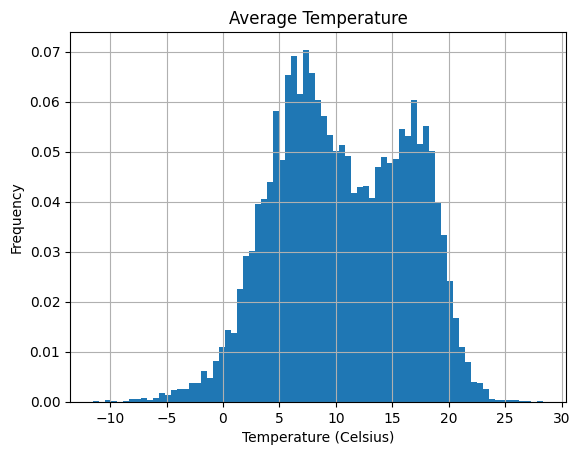

In [11]:
df['avg_temperature'].hist(density=True, bins=75)
plt.xlabel("Temperature (Celsius)"), plt.ylabel("Frequency"), plt.title("Average Temperature")
plt.show()

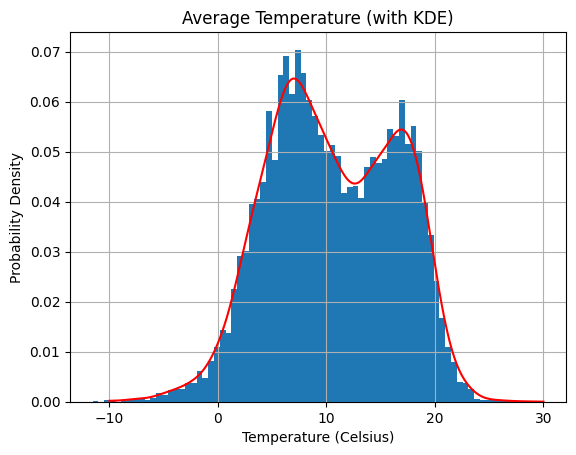

In [21]:
mu = df['avg_temperature'].mean(); sigma2 = df['avg_temperature'].var(); N = 3000

x = np.linspace(-10, 30, N)

kde = stats.gaussian_kde(df['avg_temperature'])
plt.plot(x, kde(x), 'r')
plt.hist(df['avg_temperature'], density=True, bins=75), plt.grid(True)
plt.xlabel("Temperature (Celsius)"), plt.ylabel("Probability Density"), plt.title("Average Temperature (with KDE)")
plt.show()

**Task: Compute mean and variance of precipitation, fit gamma distribution and plot with histogram of precipitation data**

Note: We expect the parameter $\alpha < 1$ therefore the probability distribution $f(x)$ satistifes $\lim \limits_{x \to 0^+} f(x) = \infty$.

In [14]:
# Mean and Variance of precipitation
mu_prep = df["precipitation"].mean(); sigma2_prep = df["precipitation"].var()

print(f"Mean of Precipitation = {mu_prep}, Variance of Precipitation = {sigma2_prep}")


Mean of Precipitation = 3.2037068239258635, Variance of Precipitation = 41.88987356711931


We can now plot the probability distribution and of precipitation and fit gamma distribution.

/var/folders/j9/99gn8v5n6vd9nfrxk4qd8cdw0000gn/T/ipykernel_5559/3111805936.py:4: RuntimeWarning: divide by zero encountered in power
  gamma = lambda x,alpha,beta: beta**alpha/sps.gamma(alpha)*x**(alpha - 1)*np.exp(-beta*x)*np.heaviside(x,1)


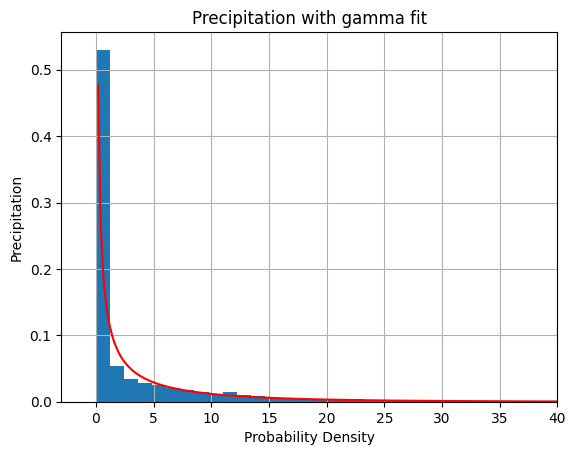

In [28]:
# plotting

alpha = (mu_prep**2)/sigma2_prep; beta = mu_prep/sigma2_prep
gamma = lambda x,alpha,beta: beta**alpha/sps.gamma(alpha)*x**(alpha - 1)*np.exp(-beta*x)*np.heaviside(x,1)
x = np.linspace(0, 40, 200)
y = gamma(x, alpha, beta)
plt.plot(x,y,'r')


df['precipitation'].hist(bins=75, density=True), plt.xlim(-3, 40)
plt.xlabel("Probability Density"), plt.ylabel("Precipitation"), plt.title("Precipitation with gamma fit")
plt.show()

**Task: Define total annual revenue $R_{total}$ and generate random samples using distributions of $T$ and $P$ and fit a distribution to $R_{total}$**

$$
R_{total} = \sum \limits_{i = 1}^{365} R_i
$$

where $R_i$ is the revenue on day $i$.

Notes: (1) Use the method `.resample` to generate random samples from a kernel desnity function created with `stats.gaussian_kde`. The method returns a 2D NumPy array which in the case of $T$ is a row vector. It may be be helpful to flatten the NumPy array into a 1-dimenional array using the `.flatten` method. For example, the following code creates a 1-dimensional array consisting of $n$ samples generated from the distribution approximated by the kernel density function:

```
kde = stats.gaussian_kde(data)
samples = kde.resample(n).flatten()
```

(2) Use the function `np.maximum(x,0)` to find the array of values $\max \{ x_i , 0 \}$ where `x` is the vector $[x_0 \ x_1 \ \cdots \ x_N]$.

Using $$C(T,P) = \max \{ c(T,P) , 0 \}, c(T,P) = C_0 + a(T - T_0) - b(P - P_0)$$ we can find the daily revenue. 

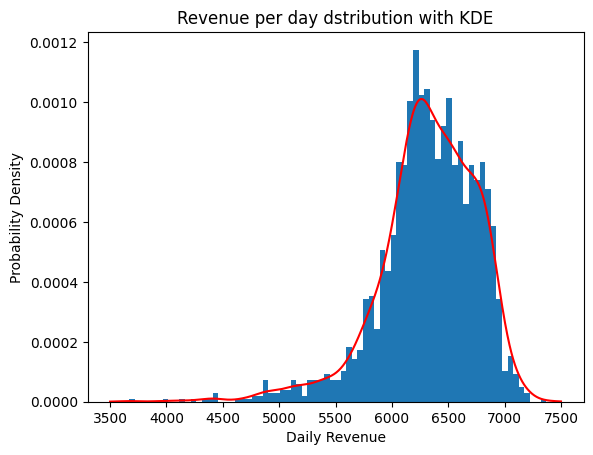

In [37]:
N = 365
C0 = 720
T0 = 25
P0 = 0
d = 10 # amount each customer spend

# a: temperature parameter and b: precipitation parameter is initially set to be 5
a = 5; b = 5

c = lambda T, P: np.maximum(C0+a*(T-T0)-b*(P-P0), 0)

P = stats.gaussian_kde(df['precipitation'])
T = stats.gaussian_kde(df['avg_temperature'])

Rs = []
for i in range(2000):
    R = d*c(T.resample(size=N).flatten(), P.resample(size=N).flatten())
    Rs.append(R[0])

kde_R = stats.gaussian_kde(Rs)

x = np.linspace(3500, 7500, 1000)
plt.hist(Rs, bins=75, density=True)
plt.plot(x,kde_R(x), 'r')


plt.xlabel("Daily Revenue"), plt.ylabel("Probability Density"), plt.title("Revenue per day dstribution with KDE")
plt.show()

We will now use `kde_R.resample(size=365)` to compute the yearly revenue, $R_{total}$. Also, since we want to estimate the probability, we will use `stats.gaussian_kde` to plot the Kernel Density Function of $R_{total}$

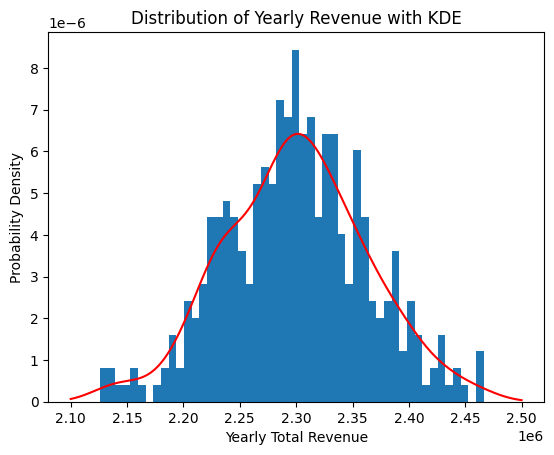

In [109]:
# number of days in a year
n = 365

R_total = []

for i in range(n):
    R = np.sum(kde_R.resample(size=n))
    R_total.append(R)

kde_Rs = stats.gaussian_kde(R_total)

x = np.linspace(2.1e6, 2.5e6, 200)
plt.hist(R_total, bins=50, density=True)
plt.plot(x,kde_Rs(x), 'r')
plt.xlabel("Yearly Total Revenue"), plt.ylabel("Probability Density"), plt.title("Distribution of Yearly Revenue with KDE")
plt.show()

### Step 5: Analysis

**Task: Analyze the solution you built in the previous steps. Answer some/all of the questions below. Pose your own questions and find answers. Be creative!**

* Find a value $R_0$ such that $P(R > R_0) = 0.9$
* How do the values $a$ and $b$ change the model?
* How do the values $C_0$, $T_0$ and $P_0$ change the model?
* How does the model change if we assume that the amount each customer spends is normally distributed?
* What are other forms of the function $C(T,P)$ are reasonable to model the number of customers per day?

(1) We will be determining a value $R_0$ such that $P(R > R_0) = 0.9$, by formulating a for loop to calculate the current probability starting from the first element of $x$. This for loop breaks as soon as the calculation reaches $0.1$. This is because we are interested in 90% threshold, but if we start from the beginning this would mean that we are looking for the 10% threshold. 

In [110]:
R0 = x[0]

for j in range(len(x)-1):
    if (kde_Rs.integrate_box_1d(x[0], R0) >= 0.1):
        break
    else:
        R0 = x[j+1]

print(f"The R0 value is {R0}")

The R0 value is 2216582.9145728643


We can check this answer by calculating the probability at $R_0$ and we can see that the probability is approximately 90%. 

In [111]:
test = kde_Rs.integrate_box_1d(R0, np.inf)

test

0.8986045766821961

(2) We will now be plotting mutliple plots with different values for $a$ and $b$. This time, we will set $a = 35$ and $b = 5$

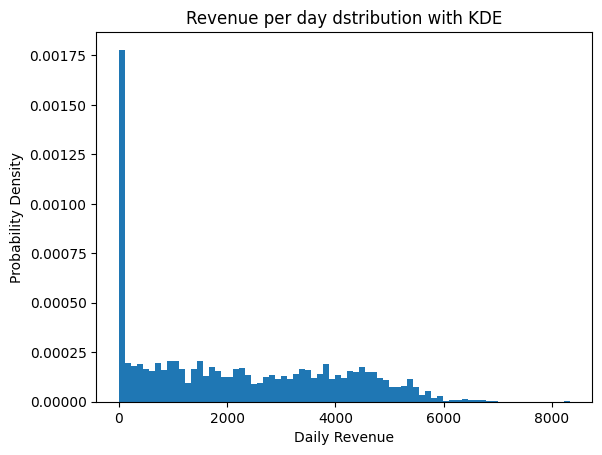

In [97]:

N = 365
C0 = 720
T0 = 25
P0 = 0
d = 10 # amount each customer spend

# a: temperature parameter and b: precipitation parameter is set to be 35 and 5
a = 35; b = 5

c = lambda T, P: np.maximum(C0+a*(T-T0)-b*(P-P0), 0)

P = stats.gaussian_kde(df['precipitation'])
T = stats.gaussian_kde(df['avg_temperature'])

Rs = []
for i in range(2000):
    R = d*c(T.resample(size=N).flatten(), P.resample(size=N).flatten())
    Rs.append(R[0])


plt.hist(Rs, bins=75, density=True)


plt.xlabel("Daily Revenue"), plt.ylabel("Probability Density"), plt.title("Revenue per day dstribution with KDE")
plt.show()

(3) Let's now consider the case where the amount each customer spend is normally distributed. 

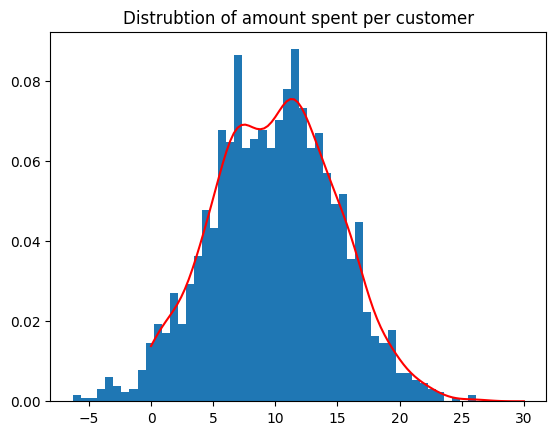

In [100]:
N = 2000
mu = 10; sigma2 = 5
D = np.random.normal(loc = mu, scale = sigma2, size=N)
kde_D = stats.gaussian_kde(D)

plt.hist(D, bins = 50, density = True)

x = np.linspace(0, 30, 100)
plt.plot(x, kde_D(x), 'r')
plt.title("Distrubtion of amount spent per customer")
plt.show()

We can also plot the total revenue with taking account $d$ as our one of random variables. 

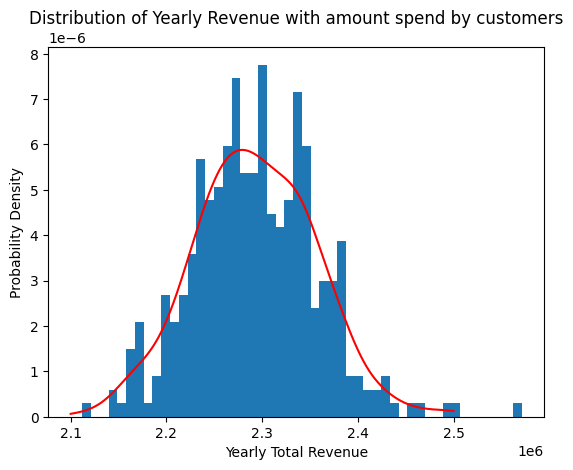

In [107]:
N = 365
C0 = 720
T0 = 25
P0 = 0
d = 10 # amount each customer spend

# a: temperature parameter and b: precipitation parameter is initially set to be 5
a = 5; b = 5

c = lambda T, P: np.maximum(C0+a*(T-T0)-b*(P-P0), 0)

P = stats.gaussian_kde(df['precipitation'])
T = stats.gaussian_kde(df['avg_temperature'])

# normally distributed for amount spent by customers
mu_d = 10; sigma2_d = 5
D = np.random.normal(loc = mu_d, scale = sigma2_d, size = 2000)
kde_D = stats.gaussian_kde(D)

Rs = []
for i in range(2000):
    R = kde_D.resample(size=N).flatten()*c(T.resample(size=N).flatten(), P.resample(size=N).flatten())
    Rs.append(R[0])

kde_R = stats.gaussian_kde(Rs)

# number of days in a year
n = 365

R_total = []

for i in range(n):
    R = np.sum(kde_R.resample(size=n))
    R_total.append(R)

kde_Rs = stats.gaussian_kde(R_total)
x = np.linspace(2.10e6, 2.5e6, 1000)
plt.hist(R_total, bins=50, density=True)
plt.plot(x, kde_Rs(x), 'r')
plt.xlabel("Yearly Total Revenue"), plt.ylabel("Probability Density"), plt.title("Distribution of Yearly Revenue with amount spend by customers")
plt.show()

As we have found out above, the $R0$, the point at which the yearly revenue is beyond, is $2216582.91. This number seems very reasonable. 

Setting $a = 35$ and $b = 5$ resulted in a distribution where the probability density near 0 is the highest. This means that the revenue is inversely proportional to temperature parameter. Thus, appropriate value for both $a$ and $b$ is needed. 

### Step 6: Report Results

**Task: Review your work in steps 1-5 and add discussion as needed and finally summarize your work here.**

This model, on finding the total revenue, depending on temperature and precipitation, concluded in approximately $6200 on daily revenue and approximately $2.3 million on annual revenue. 

When the amount each customer spends was considered to be randomally distributed, the average spending per customer was around $12. With this study, we could see that the yearly total revenue has changed. 

## Part B: Collaborate, Refine, and Simulate the Model

After submitting your work in Part A in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part A along with:

* Numerical solutions
* Visualizations of solutions
* Analysis and discussion of the results

In addition, include a clearly labelled *Reflection* section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part B.

#### Reflection

This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

1. Changes

* Did not consider temperature to be normally distributed. This allowed me to fit the model much easier. 
* Included gamma distribution in code
* Fixed the issue with sampling, associating with `resample()` and `flatten()`
* Was able to plot histogram on total revenue and its probability density function using KDE.
* Added the part on analysis of the value where the probability was at 90%
* Further analysis on different $a$, $b$ values, as well as what happens when the amount each customer spends is noramlly distributed

2. Reflection
In this modelling assignment, the most difficult part was sampling in building solutions. The coding part was too confusing to me and I was not familiar with gamma distribution. I think I need to work more on understanding the code and what each code does. Another thing that I struggled on was lack of comprehension on the problem. As soon as I saw the problem, I was not able to wrap my head around it and hence, it took me awhile to start with this assignment. For this matter, I will need to expose myself more to problems like this, so that I know what to expect.